<a href="https://colab.research.google.com/github/garfield-gray/Optimization/blob/main/NonConvex/gradient_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Gradient Backtracking

##1

In [ ]:

import numpy.linalg as la
def gradient_method_backtracking(f, g, x0, s, alpha, beta, epsilon):
  x = x0
  grad = g(x)
  fun_val = f(x)
  iter = 0
  while la.norm(grad) > epsilon:
    iter = iter + 1
    t = s
    while fun_val - f(x - t * grad) < alpha * t * la.norm(grad)**2:
      t=beta*t
    x = x - t * grad
    fun_val = f(x)
    grad = g(x)
    # print('iter_number = {0:3d}'.format(iter),\
    #       'norm_grad = {0:2.6f}'.format(la.norm(grad)),\
    #       'fun_val = {0:2.6f}'.format(fun_val))
  return x, fun_val, iter

In [ ]:
A = np.array([[1, 0], [0, 2]])
f = lambda x : x @ A @ x
g = lambda x : 2 * A @ x
x0 = np.array([2.0, 1.0])
print(gradient_method_backtracking(f, g, x0, 2, 0.25, 0.5, 1e-5))

(array([0., 0.]), 0.0, 2)


In [ ]:
iter

<function iter>

##2

In [ ]:
A = np.array([[1, 0], [0, 0.01]])
x0 = np.array([0.01, 1.0])
print(gradient_method_backtracking(f, g, x0, 2, 0.25, 0.5, 1e-5))

(array([0.        , 0.00049166]), 2.417269699979995e-09, 201)


##3

In [ ]:
df = pd.DataFrame(columns=["s", "alpha", "beta", "iter"])
for s in np.arange(1, 3, 0.1):
  for alpha in np.arange(0.05, 0.5, 0.05):
    for beta in np.arange(0.05, 1, 0.05):
      new_row = {"s": s, "alpha": alpha, "beta": beta, "iter": gradient_method_backtracking(f, g, x0, s, alpha, beta, 1e-5)[2]}
      df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
df.where(df['iter']==df['iter'].min()).dropna()

,s,alpha,beta,iter
2568,2.5,0.05,0.2,154
2587,2.5,0.10,0.2,154
2606,2.5,0.15,0.2,154
2625,2.5,0.20,0.2,154
2644,2.5,0.25,0.2,154
2663,2.5,0.30,0.2,154
2682,2.5,0.35,0.2,154
2701,2.5,0.40,0.2,154
2720,2.5,0.45,0.2,154


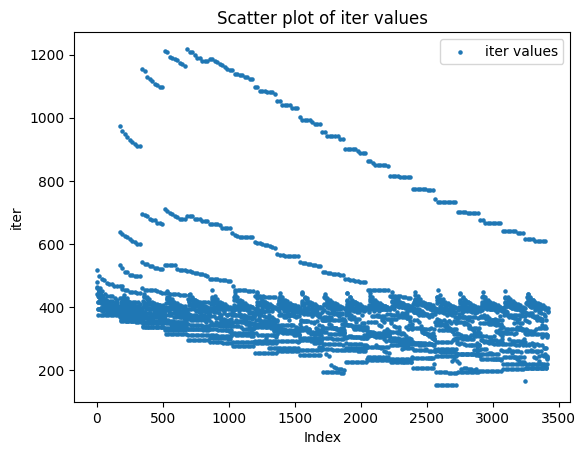

In [ ]:
plt.scatter(df.index, df["iter"], label="iter values", s = 5)

# Set labels and title
plt.xlabel("Index")
plt.ylabel("iter")
plt.title("Scatter plot of iter values")

# Show legend
plt.legend()

# Show plot
plt.show()

We have run tried the gradiend algorithm with different values of \\
s, α and β and we observed that iterations could range \\
from 154 to over a 1000 iterations which is a considerable difference. Interestingly though, the "α" parameter doesn't have \\
the effect of the other 2, since the minimum has happened in multiple values if \alpha but fixed values of s and β
All that to say this algorithm is sensitive to its hyperparameters \\
and they must be choosed caringly.

##4

In [ ]:
dfy = pd.DataFrame(columns=["y", "iter"])

for y in np.arange(0.001, 1.001, 0.001):
  A = np.array([[1, 0], [0, y]])
  new_row = {"y": y, "iter": gradient_method_backtracking(f, g, x0, 2, 0.25, 0.5, 1e-5)[2]}
  dfy = pd.concat([dfy, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
dfy

,y,iter
0,0.001,1323
1,0.002,747
2,0.003,531
3,0.004,416
4,0.005,343
...,...,...
995,0.996,3
996,0.997,3
997,0.998,2
998,0.999,2


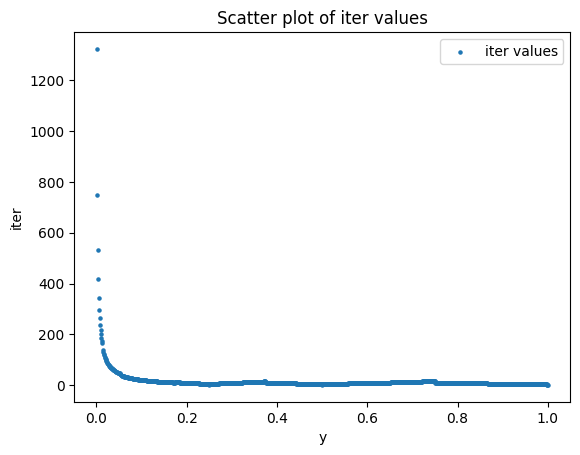

In [ ]:
plt.scatter(dfy["y"], dfy["iter"], label="iter values", s = 5)

# Set labels and title
plt.xlabel("y")
plt.ylabel("iter")
plt.title("Scatter plot of iter values")

# Show legend
plt.legend()

# Show plot
plt.show()

In [ ]:
dfy.where(dfy['iter']==dfy['iter'].min()).dropna()

,y,iter
999,1.0,1


There's obviously a correlation between number of iterations of this \\
algorithm and the condition number of its hessian matrix (plotted below) \\
as we can see with bigger values for the coefficient of "y" the condition number gets smaller and hence the number of iterations.

In [ ]:
dfc = pd.DataFrame(columns=["y", "cond"])

for y in np.arange(0.001, 1.001, 0.001):
  A = np.array([[1, 0], [0, y]])
  new_row = {"y": y, "cond": la.cond(A)}
  dfc = pd.concat([dfc, pd.DataFrame([new_row])], ignore_index=True)

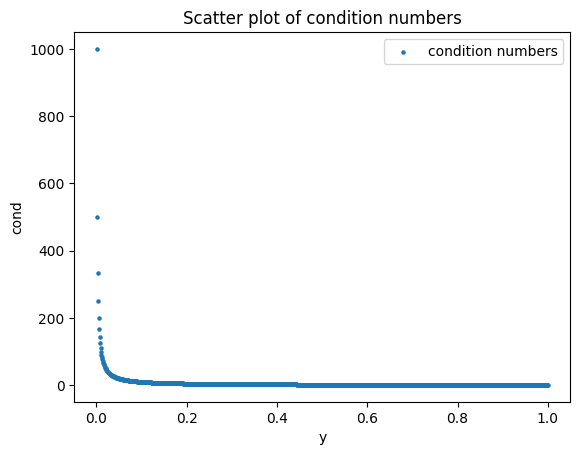

In [ ]:
plt.scatter(dfc["y"], dfc["cond"], label="condition numbers", s = 5)

# Set labels and title
plt.xlabel("y")
plt.ylabel("cond")
plt.title("Scatter plot of condition numbers")

# Show legend
plt.legend()

# Show plot
plt.show()

#Pure Newton

##1

In [ ]:
def pure_netwon(f, g, h, x0, epsilon):
  x = x0
  gval = g(x)
  hval = h(x)
  iter = 0
  while la.norm(gval) > epsilon and iter < 10000:
    iter = iter + 1
    x = x - la.solve(hval, gval)
    fun_val = f(x)
    gval = g(x)
    hval = h(x)
    # print('iter = {0:3d}'.format(iter),\
    #       'f(x) = {0:2.6f}'.format(fun_val))
    if (iter==10000):
      print('did not converge')
  return x, iter

##2

In [ ]:
A = np.array([[1, 0], [0, 0.01]])
f = lambda x : x @ A @ x
g = lambda x : 2 * A @ x
h = lambda x : 2 * A
x0 = np.array([2.0, 1.0])
pure_netwon(f, g, h, x0, 1e-6)

(array([0., 0.]), 1)

##3

The pure_newton algorithm doesn't have the rparametrs except for epsilon that is for termination.

##4

In [ ]:
dfp = pd.DataFrame(columns=["y", "iter"])

for y in np.arange(0.001, 1.001, 0.001):
  A = np.array([[1, 0], [0, y]])
  new_row = {"y": y, "iter": pure_netwon(f, g, h, x0, 1e-6)[1]}
  dfp = pd.concat([dfp, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
dfp

,y,iter
0,0.001,1
1,0.002,1
2,0.003,1
3,0.004,1
4,0.005,1
...,...,...
995,0.996,1
996,0.997,1
997,0.998,1
998,0.999,1


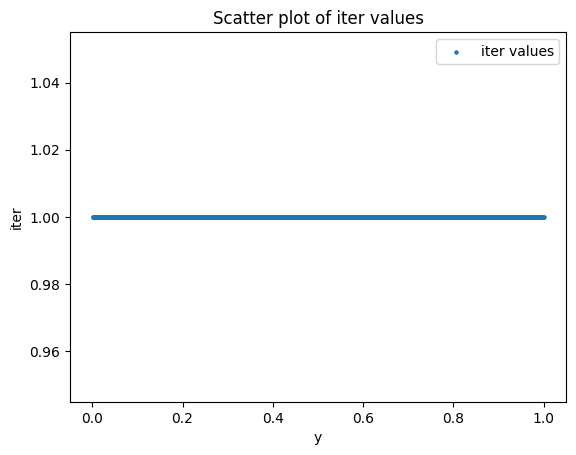

In [ ]:
plt.scatter(dfp["y"], dfp["iter"], label="iter values", s = 5)

# Set labels and title
plt.xlabel("y")
plt.ylabel("iter")
plt.title("Scatter plot of iter values")

# Show legend
plt.legend()

# Show plot
plt.show()

In [ ]:
# impressive!

The pure_nowton algorithm uses the hessian matrix in itself making it nonsensitive to \\
the parameters of function. \\
But of course there's no free lunch! the cost of this algorithm's way higher than the gradient method including the calculation of the hessian and its inverse. it depends on the situation which one works the best